# Decision Tree ( Fraud DataSet ) 

### Use decision trees to prepare a model on fraud data  treating those who have taxable_income <= 30000 as "Risky" and others are "Good" 

## 1.  <u>Data Description :

**Undergrad :** person is under graduated or not.
    
**Marital.Status :** marital status of a person.
    
**Taxable.Income :** Taxable income is the amount of how much tax an individual owes to the government.
    
**Work Experience :** Work experience of an individual person.
    
**Urban :** Whether that person belongs to urban area or not.
 

# 2. <u> Import Neccesery Libraries -  

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

# 2. <u>Import Warnings -  

In [153]:
import warnings
warnings.filterwarnings('ignore')

# 3.<u>Import Dataset -  

In [154]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# 4. <u> EDA -  

In [155]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [156]:
fraud_data.duplicated().sum()

0

In [157]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [158]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# 5. <u> Data Visualization -  

In [159]:
corr=fraud_data.corr()
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


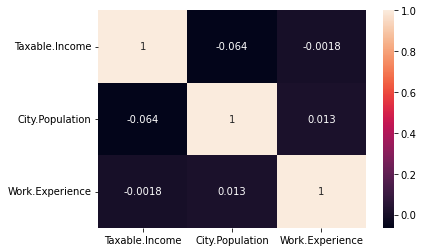

In [160]:
sns.heatmap(corr,annot=True)
plt.show()

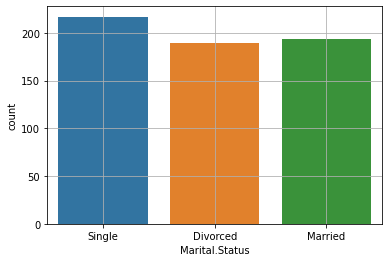

In [161]:
sns.countplot(x='Marital.Status',data=fraud_data)
plt.grid(True)
plt.show()

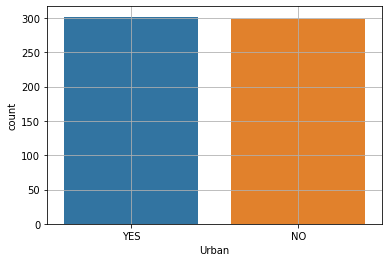

In [162]:
sns.countplot(x='Urban',data=fraud_data)
plt.grid(True)
plt.show()

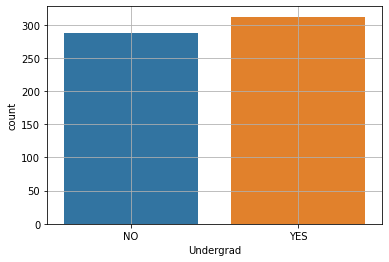

In [163]:
sns.countplot(x='Undergrad',data=fraud_data)
plt.grid(True)
plt.show()

In [164]:
fraud_data['Taxable.Income'] = fraud_data['Taxable.Income'].apply(lambda x:'Risky' if x<=30000 else 'Good')

In [165]:
fraud_data.rename({'Taxable.Income' : 'Taxable_Income'}, axis = 1, inplace = True)

In [166]:
fraud_data

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [167]:
fraud_data['Taxable_Income'].value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

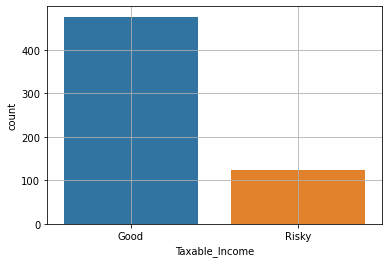

In [168]:
sns.countplot(fraud_data['Taxable_Income'])
plt.grid(True)
plt.show()

# 6. <u> Data Preparation -  

In [169]:
fraud_data['Taxable_Income'] = fraud_data['Taxable_Income'].apply(lambda x:1 if x == 'Good' else 0)

In [170]:
fraud_data

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [171]:
fraud_data['Taxable_Income'].value_counts()

1    476
0    124
Name: Taxable_Income, dtype: int64

## Label Encoding 

In [172]:
#encoding categorical fraud_data
label_encoder = preprocessing.LabelEncoder()

In [173]:
fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

fraud_data

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


# 7. <u> Model Building -  

In [174]:
X=fraud_data.drop('Taxable_Income',axis=1)
y=fraud_data[['Taxable_Income']]

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 12)

In [176]:
X_train.shape,y_train.shape

((402, 5), (402, 1))

In [177]:
X_test.shape,y_test.shape

((198, 5), (198, 1))

# 8. <u> Building Decision Tree Classifier using Entropy Criteria - 

In [178]:
tree_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

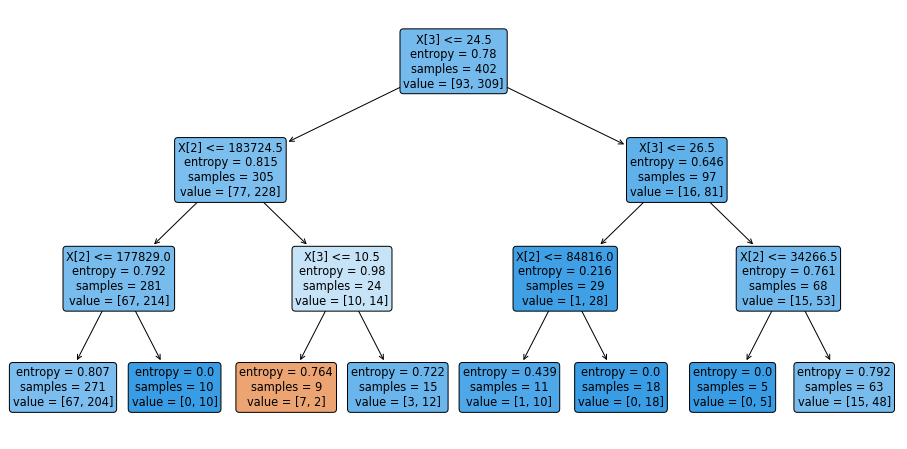

In [179]:
plt.figure(figsize=(16,8))
tree.plot_tree(tree_model,filled=True, rounded=True)
plt.show()

In [182]:
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [189]:
pd.Series(y_pred_test).value_counts()

1    193
0      5
dtype: int64

In [183]:
accuracy_score(y_train,y_pred_train) # train data

0.7810945273631841

In [184]:
confusion_matrix(y_train,y_pred_train)

array([[  7,  86],
       [  2, 307]], dtype=int64)

In [185]:
accuracy_score(y_test,y_pred_test) # test data

0.8181818181818182

In [186]:
confusion_matrix(y_test,y_pred_test)

array([[  0,  31],
       [  5, 162]], dtype=int64)

# 9. <u> Building Decision Tree Classifier using Gini Criteria - 

In [187]:
tree_model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
tree_model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

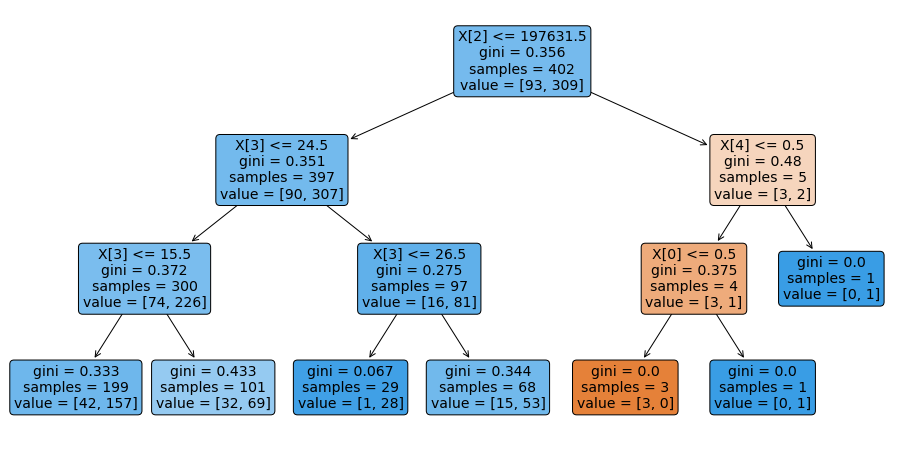

In [188]:
plt.figure(figsize=(16,8))
tree.plot_tree(tree_model_gini,filled=True, rounded=True)
plt.show()

In [142]:
y_pred_train_gini = tree_model_gini.predict(X_train)
y_pred_test_gini = tree_model_gini.predict(X_test)
y_pred_test_gini

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [190]:
pd.Series(y_pred_test_gini).value_counts()

1    198
dtype: int64

In [143]:
accuracy_score(y_train,y_pred_train_gini)

0.7761194029850746

In [144]:
confusion_matrix(y_train,y_pred_train_gini)

array([[  3,  90],
       [  0, 309]], dtype=int64)

In [145]:
accuracy_score(y_test,y_pred_test_gini)

0.8434343434343434

In [146]:
confusion_matrix(y_test,y_pred_test_gini)

array([[  0,  31],
       [  0, 167]], dtype=int64)

# ========================== END ============================= 